In [1]:
import sys
sys.path.append('/home/t/tingli/tingli/pythoncode/')


import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy import table
from astropy.coordinates import SkyCoord
from astropy import units as u
from start_plot import *
from astropy.io import fits as pyfits

datadir = '../data/GC/GCmembers/'

In [2]:
gc_mem = table.vstack([table.Table.read(i) for i in glob.glob(datadir+'*_gaia.fits')])

In [3]:
gc_sum_6d = table.Table.read('../data/GC/gc_summary_6D.txt', format='ascii')

gc_sum_6d.rename_column('Name', 'gcname')
gc_sum_6d.rename_column('ra', 'gc_ra')
gc_sum_6d.rename_column('dec', 'gc_dec')
gc_sum_6d.rename_column('dist', 'gc_dist')
gc_sum_6d.rename_column('disterr', 'gc_dist_error')
gc_sum_6d.rename_column('vlos', 'gc_vlos')
gc_sum_6d.rename_column('vloserr', 'gc_vlos_error')
gc_sum_6d.rename_column('sigma', 'gc_velocity_dispersion')
gc_sum_6d.rename_column('pmra', 'gc_pmra')
gc_sum_6d.rename_column('pmra_e', 'gc_pmra_error')
gc_sum_6d.rename_column('pmdec', 'gc_pmdec')
gc_sum_6d.rename_column('pmdec_e', 'gc_pmdec_error')
gc_sum_6d.remove_columns(['rmax', 'plx', 'pmcorr','plx_e'])

In [6]:
gc_sum = table.Table.read('../data/GC/gc_summary.csv')
gc_sum

key,name,ra,dec,rhalf,rhalf_error,rhalf_H10,rhalf_error_H10,pa,pa_error,ell,ell_error,ref_structure,dm,dm_error,dist_helio,dist_helio_error,dist_galactic,dist_galactic_error,ref_distance,rhalf_physical,rhalf_sph_physical,rcore,rcore_error,rt,rking,rking_error,king_concentration,king_concentration_error,ref_king,V_mag,V_mag_error,M/L_V,M/L_V_error,mass,mass_error,L_V_from_M/L_V,L_V_from_M/L_V_error,M_V_from_M/L_V,M_V_from_M/L_V_error,ref_mv,M_V_HE,vlos,vlos_error,sigma,sigma_error,ref_spectra,pmra,pmra_error,pmdec,pmdec_error,ref_proper_motion,metallicity_K19,metallicity_F10,metallicity_D11,metallicity_V13,metallicity_H10,metallicity_B19,metallicity_error_B19,metallicity_HE,metallicity_V20,metallicity_error_lower_V20,metallicity_error_upper_V20,age_K19,age_error_K19,age_F10,age_error_F10,age_D11,age_error_D11,age_V13,age_error_V13,age_HE,age_error_HE,age_V20,age_error_lower_V20,age_error_upper_V20,tidal_Z22,tidal_P20,tidal_G21,tidal_fluffy_G21,apo,peri,apo_LMC,peri_LMC,ecc,j_r,j_z,j_p,E
str12,str14,float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,str2,str2,str2,float64,float64,float64,float64,float64,float64,float64,float64,float64
2ms_gc01,2MASS-GC01,272.090851,-19.829723,3.6,--,1.65,--,--,--,--,--,--,12.64,0.4,3.37,0.62,4.9,0.57,--,3.53,--,0.5,--,28.9,--,--,--,--,--,27.7,--,1.8,--,35100,--,19500.0,--,-5.9,--,--,--,-31.28,0.5,2.7,--,--,-1.121,0.296,-1.881,0.235,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,5.23,3.89,5.23,3.89,0.15,16.95,0.29,996.89,-189590.79
2ms_gc02,2MASS-GC02,272.4021,-20.778889,1.38,--,0.55,--,--,--,--,--,--,13.7,0.17,5.5,0.44,2.91,0.37,--,2.2,--,0.63,--,15.28,--,--,--,--,--,24.6,--,1.8,--,15800,--,8777.78,--,-5.03,--,--,--,-237.75,10.1,2.2,--,--,4.0,0.9,-4.7,0.8,--,--,--,--,--,-1.08,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,6.61,1.07,6.61,1.07,0.74,399.5,79.7,213.54,-191185.86
am_1,AM_1,58.759586,-49.615276,0.43,--,0.41,--,--,--,--,--,--,20.38,0.06,118.91,3.4,120.27,3.28,--,14.91,--,6.56,--,266.24,--,--,--,--,--,15.07,0.06,0.81,0.17,19200,3840.0,23703.7,6871.95,-6.11,0.31,--,-6.11,118.0,14.14,0.9,--,--,0.291,0.107,-0.177,0.086,--,-1.48,-1.47,-1.5,--,-1.7,--,--,-1.7,--,--,--,11.1,0.56,11.1,1.0,11.1,0.5,--,--,--,--,--,--,--,N,--,--,N,124.61,2.86,123.28,3.93,0.96,--,--,-913.37,-57862.63
am_4,AM_4,209.089066,-27.165171,0.76,--,0.43,--,--,--,--,--,--,17.31,0.07,29.01,0.94,24.58,0.87,--,6.38,--,2.15,--,51.0,--,--,--,--,--,16.49,0.06,3.63,0.75,756,151.0,208.26,59.85,-0.97,0.31,--,-0.97,151.19,2.85,0.2,--,--,-0.291,0.445,-2.512,0.344,--,-0.97,-0.97,--,--,-1.3,--,--,-1.3,--,--,--,9.0,0.5,9.0,0.5,--,--,--,--,--,--,--,--,--,N,G3,--,N,30.17,24.28,30.89,23.63,0.11,--,--,-1769.82,-97924.36
arp_2,Arp_2,292.183807,-30.355639,1.7,--,1.77,--,--,--,--,--,--,17.29,0.03,28.73,0.34,21.39,0.33,--,14.17,--,7.84,--,85.77,--,--,--,--,--,11.65,0.06,1.8,0.31,37000,6130.0,20555.56,4912.26,-5.95,0.26,--,-5.95,122.64,0.29,1.3,--,--,-2.331,0.031,-1.475,0.029,--,-1.66,-1.45,-1.8,-1.74,-1.75,--,--,-1.75,-1.81,0.18,0.15,11.96,0.51,10.88,0.77,13.0,0.75,12.0,0.38,12.4,0.3,13.42,1.65,1.24,--,--,--,N,50.96,18.02,49.46,17.99,0.48,--,--,1359.05,-86042.26
bh_140,BH_140,193.472915,-67.177276,4.45,--,--,--,--,--,--,--,--,13.41,0.11,4.81,0.25,6.86,0.01,--,6.23,--,4.82,--,51.41,--,--,--,--,--,9.15,0.12,2.49,0.34,59900,4970.0,24056.22,3843.67,-6.12,0.17,--,-6.13,90.3,0.35,2.4,--,--,-14.848,0.024,1.224,0.024,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--

In [8]:
tmp = gc_sum['name', 'metallicity_H10', 'metallicity_K19', 'metallicity_B19', 'metallicity_error_B19', \
             'metallicity_V20','metallicity_error_lower_V20', 'metallicity_error_upper_V20', \
             'age_K19', 'age_error_K19', 'age_V20', 'age_error_lower_V20','age_error_upper_V20' 
              ]

tmp.rename_column('name', 'gcname')



In [9]:
comb1 = table.join(gc_mem, gc_sum_6d, keys='gcname', join_type='left')

In [10]:
comb2 = table.join(comb1, tmp, keys='gcname', join_type='left')

In [16]:
comb2.write('../data/gc_mem_P03_gaiadr3_wDist_wFeH_wAge.fits')

(array([  1611.,   1631.,   1553.,   1600.,   1606.,   1616.,   1673.,
          1770.,   1925.,   2060.,   2223.,   2413.,   2725.,   3144.,
          3936.,   4880.,   6701.,  10260.,  20922., 393446.]),
 array([0.300003  , 0.33500285, 0.3700027 , 0.40500255, 0.4400024 ,
        0.47500225, 0.5100021 , 0.54500195, 0.5800018 , 0.61500165,
        0.6500015 , 0.68500135, 0.7200012 , 0.75500105, 0.7900009 ,
        0.82500075, 0.8600006 , 0.89500045, 0.9300003 , 0.96500015,
        1.        ]),
 <BarContainer object of 20 artists>)

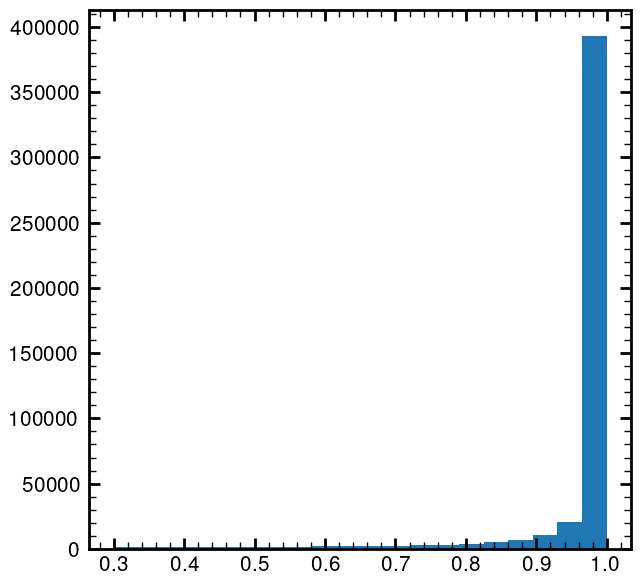

In [17]:
plt.hist(comb2['memberprob'],bins=20)

In [18]:
comb3 = comb2[comb2['memberprob']>0.9]

In [19]:
len(comb3)

423437

In [20]:
comb3.write('../data/gc_mem_P09_gaiadr3_wDist_wFeH_wAge.fits')

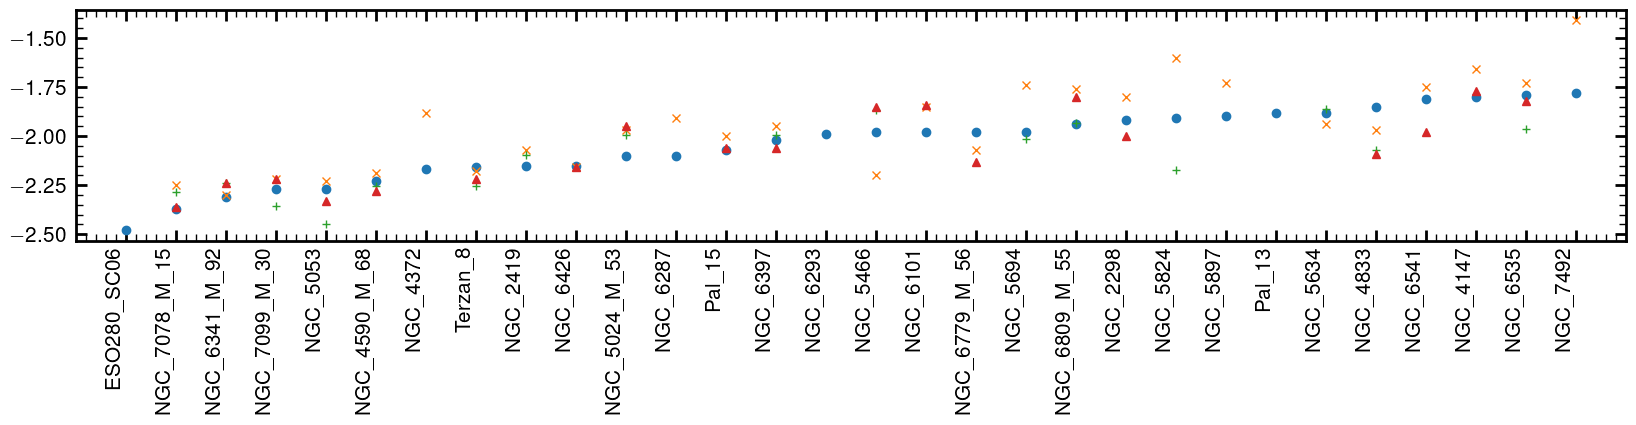

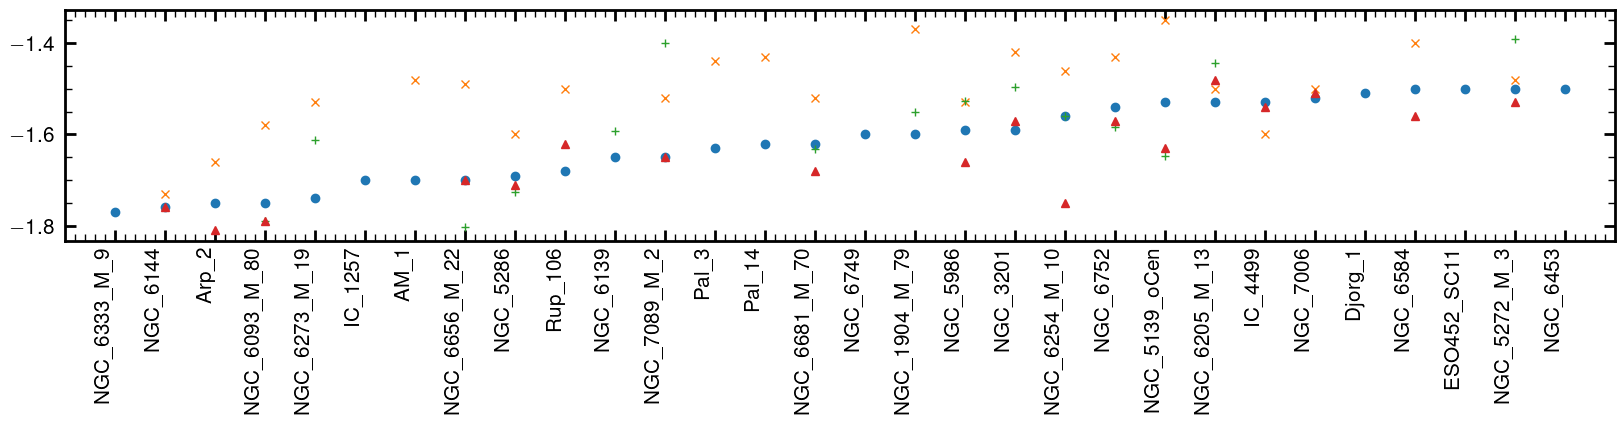

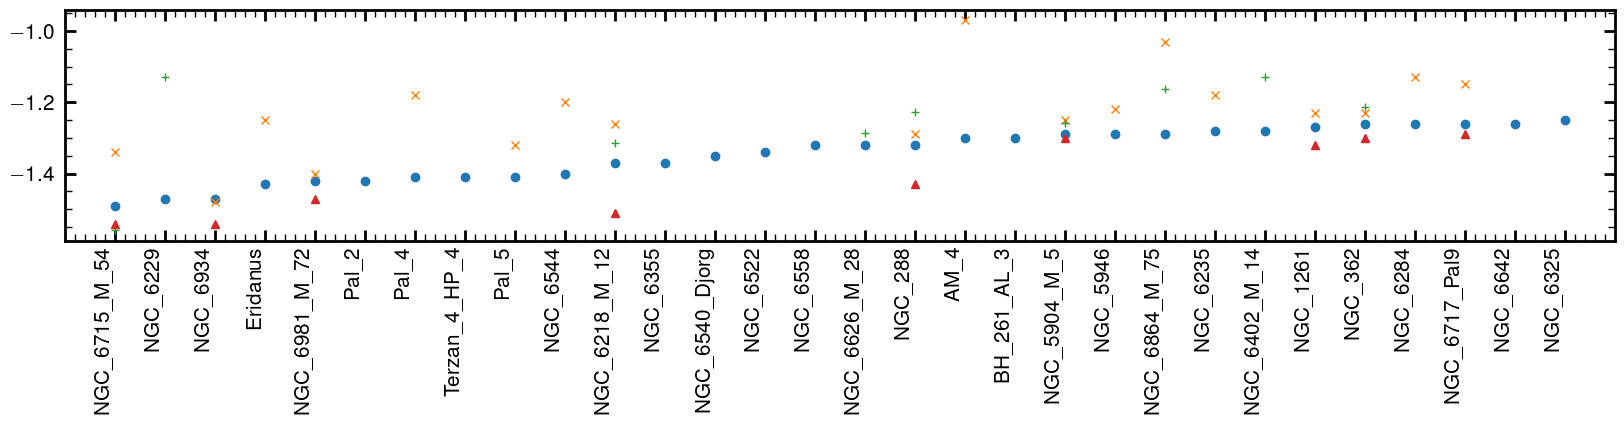

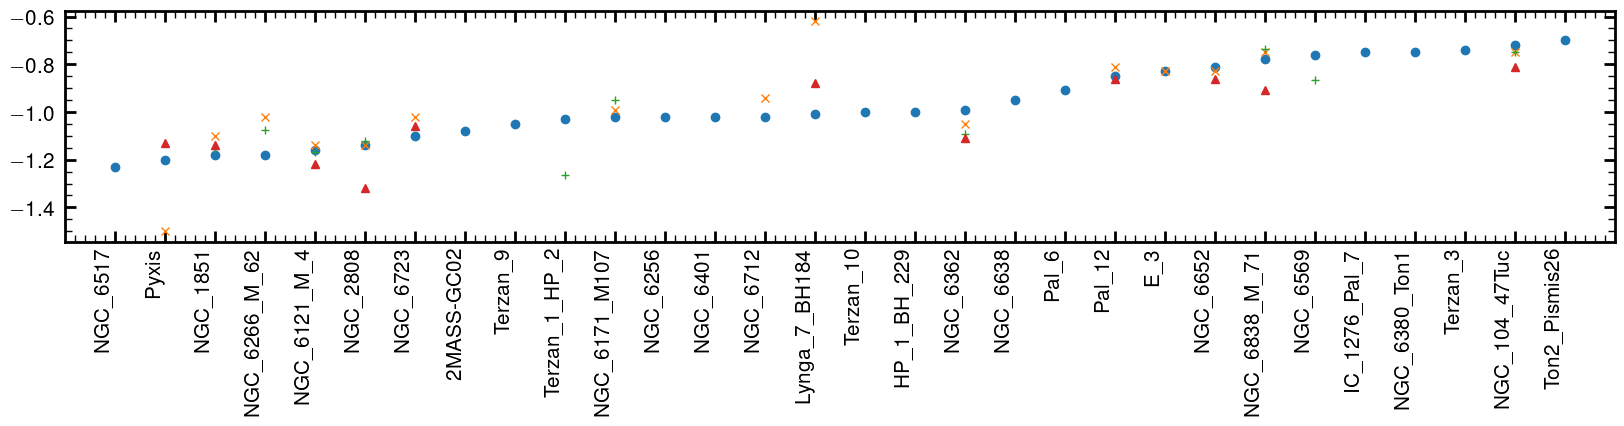

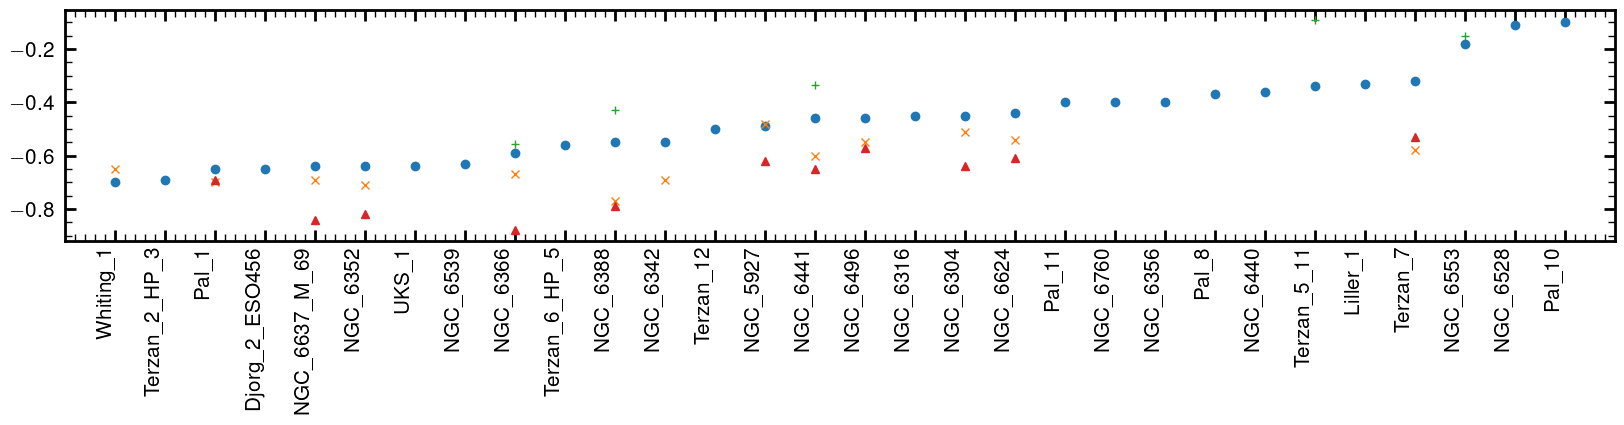

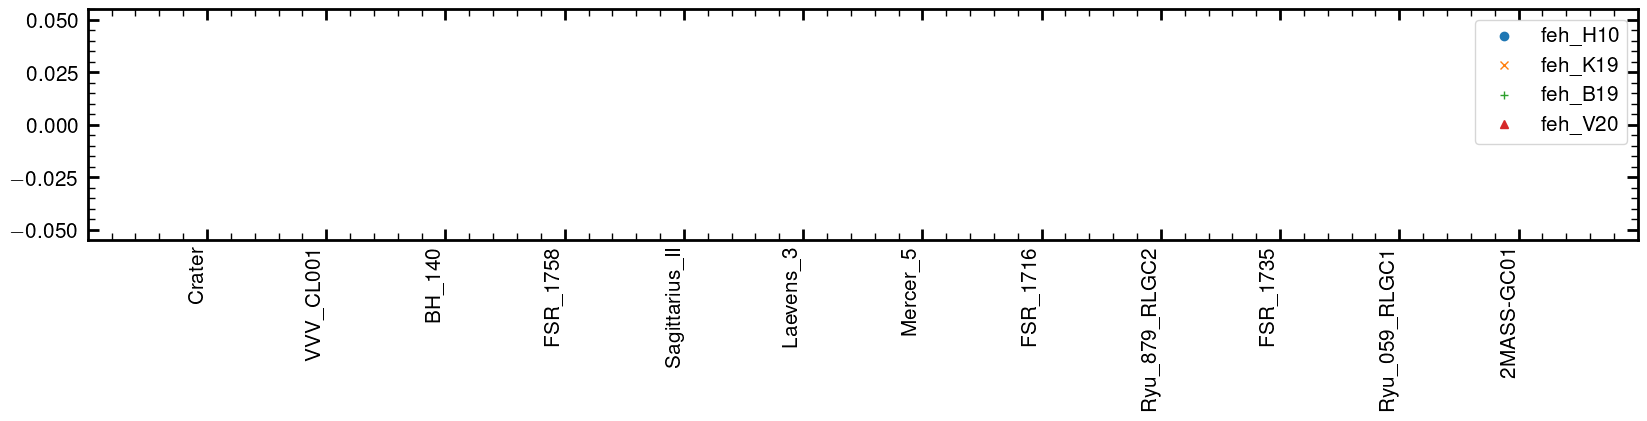

In [37]:
tmp.sort('metallicity_H10')

n = 30
total = len(tmp)
npanel = int(total/n+1)
idx = range(total)

for i in range(npanel):
    plt.figure(figsize=[20,3])
    x = idx[i*n:(i+1)*n]
    plt.plot(x, tmp['metallicity_H10'][i*n:(i+1)*n],'o', label='feh_H10')
    plt.plot(x, tmp['metallicity_K19'][i*n:(i+1)*n],'x', label='feh_K19')
    plt.plot(x, tmp['metallicity_B19'][i*n:(i+1)*n],'+', label='feh_B19')
    plt.plot(x, tmp['metallicity_V20'][i*n:(i+1)*n],'^', label='feh_V20')
    plt.xlim(x[0]-1, x[-1]+1)
    my_xticks = tmp['gcname'][i*n:(i+1)*n]
    plt.xticks(x, my_xticks)
    plt.xticks(rotation=90, ha='right')
    if i == npanel-1:
        plt.legend(loc=1)
    #plt.tight_layout()
    plt.savefig('figs/gc_feh_'+str(i)+'.pdf')
    


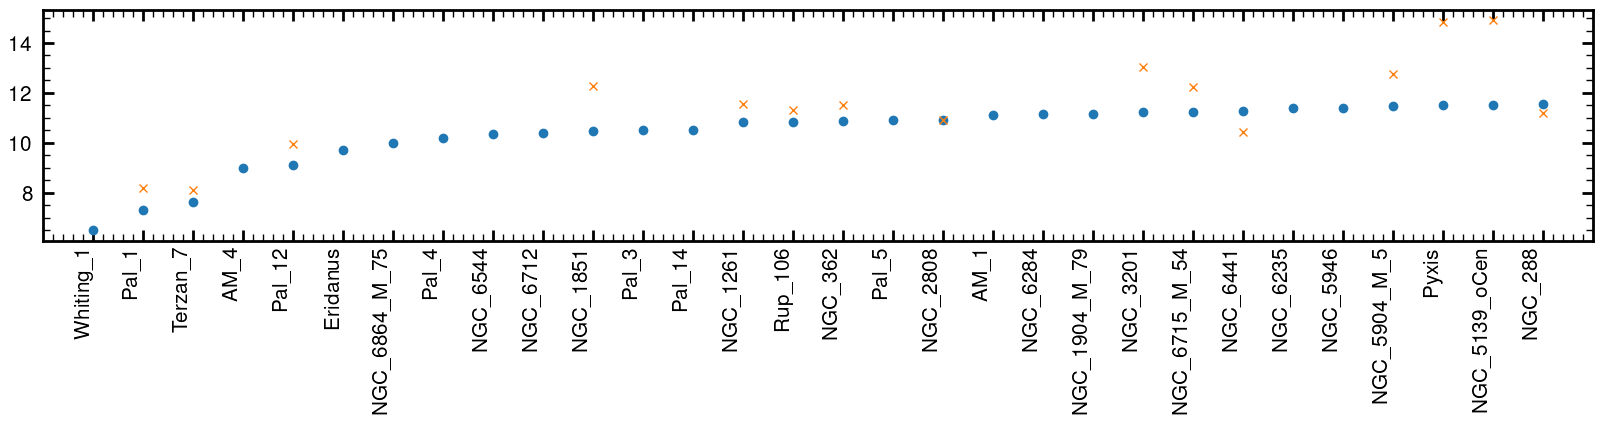

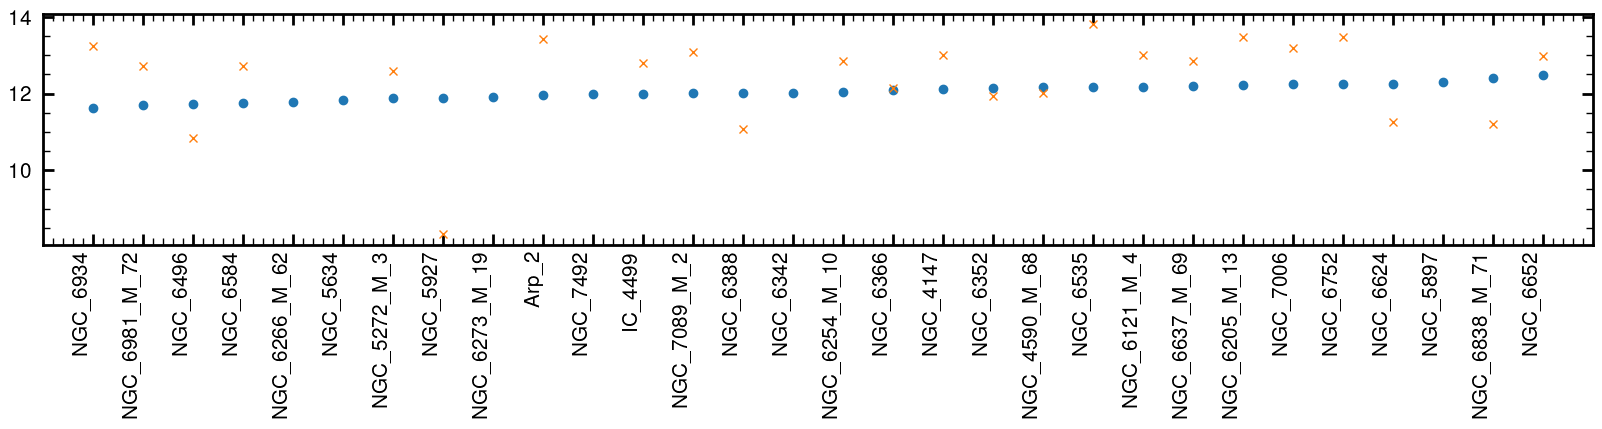

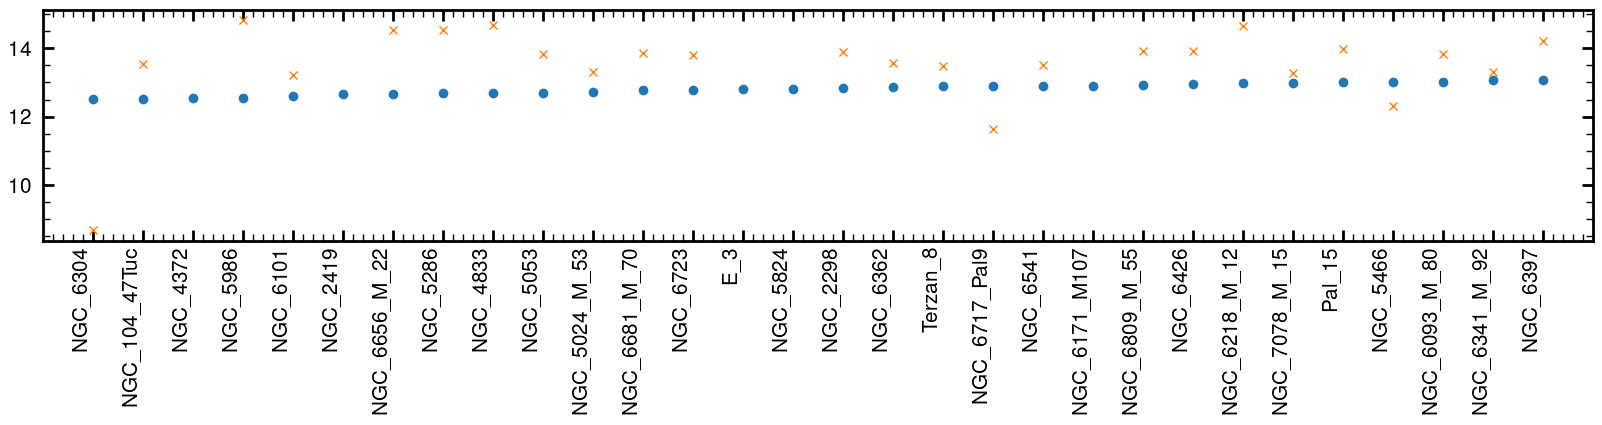

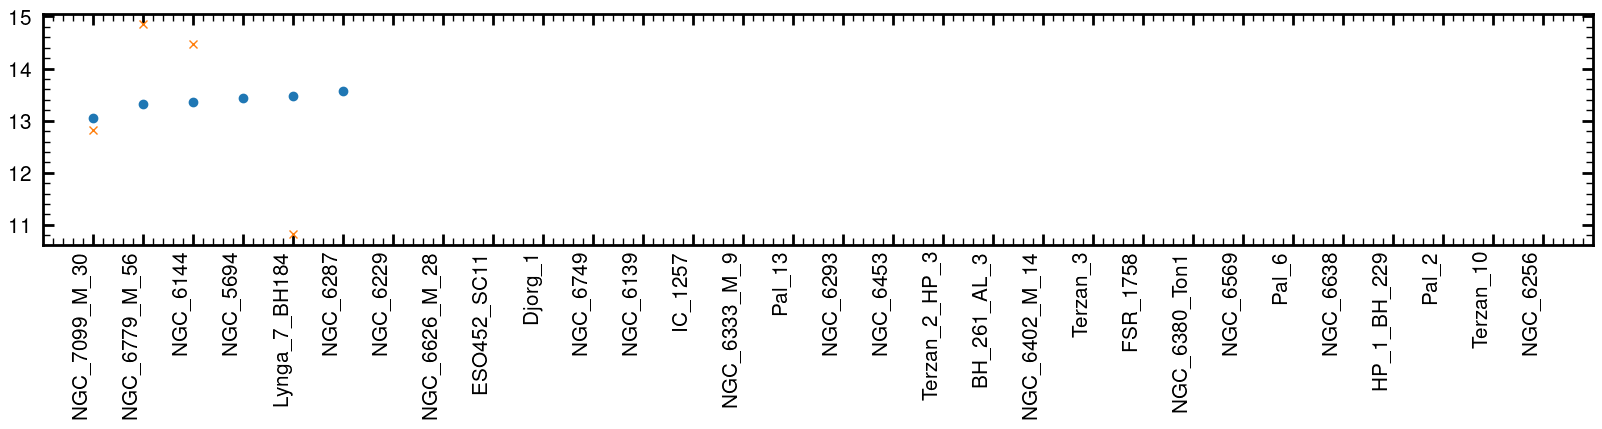

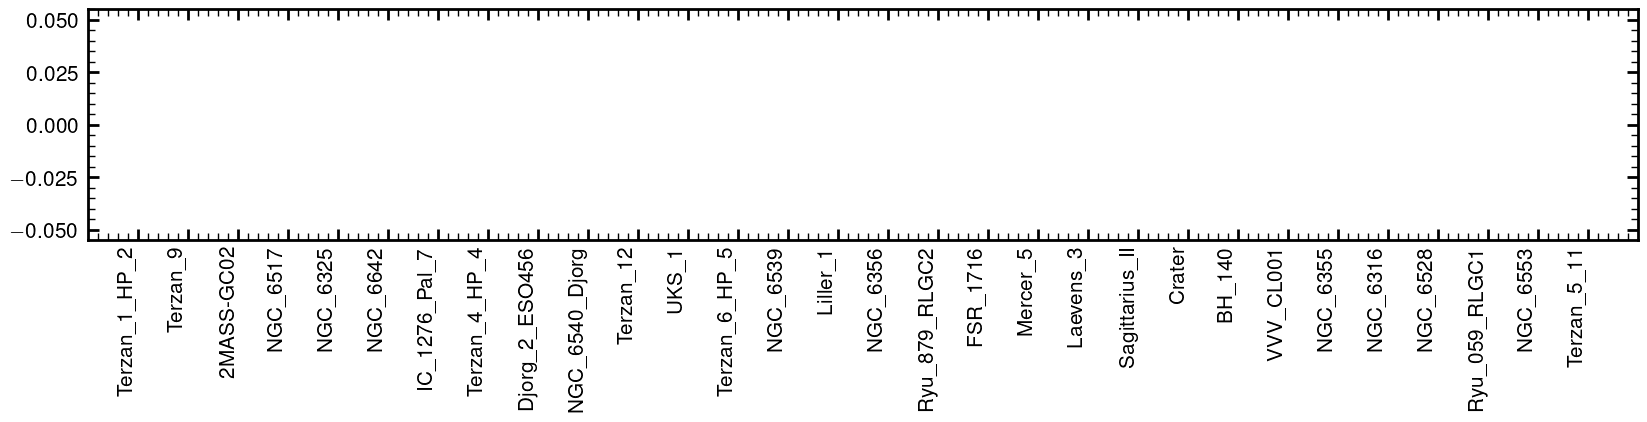

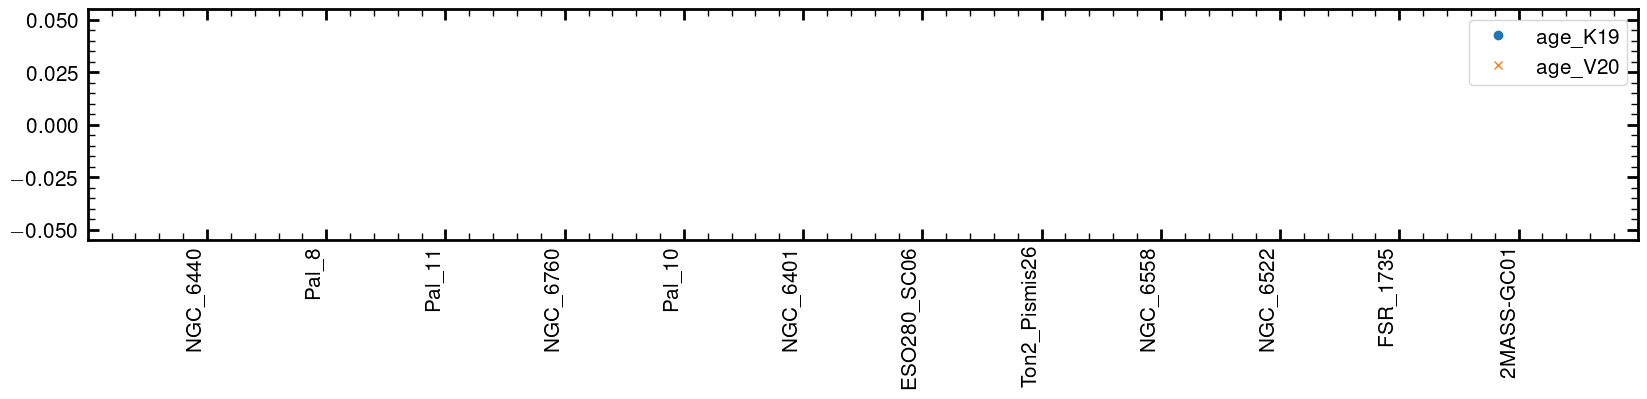

In [36]:
tmp.sort('age_K19')
n = 30
total = len(tmp)
npanel = int(total/n+1)
idx = range(total)

for i in range(npanel):
    plt.figure(figsize=[20,3])
    x = idx[i*n:(i+1)*n]
    plt.plot(x, tmp['age_K19'][i*n:(i+1)*n],'o', label='age_K19')
    plt.plot(x, tmp['age_V20'][i*n:(i+1)*n],'x', label='age_V20')
    plt.xlim(x[0]-1, x[-1]+1)
    my_xticks = tmp['gcname'][i*n:(i+1)*n]
    plt.xticks(x, my_xticks)
    plt.xticks(rotation=90, ha='right')
    if i == npanel-1:
        plt.legend(loc=1)
    #plt.tight_layout()
    plt.savefig('figs/gc_age_'+str(i)+'.pdf')
